In [23]:
import pandas as pd
import numpy as np

Base_Credit = pd.read_csv('credit_data.csv')
print(Base_Credit)
print(f'\n\n{Base_Credit.describe()}')
print(Base_Credit.columns)
print(f'\n\n{Base_Credit.isnull().sum()}')

      clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]


          clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     57

Text(0, 0.5, 'Quantidade de entrevistados')

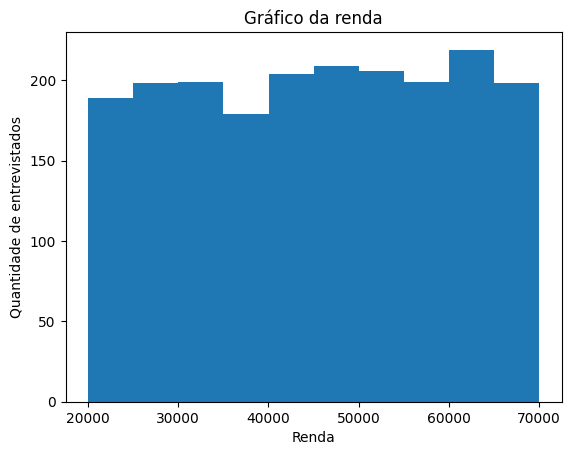

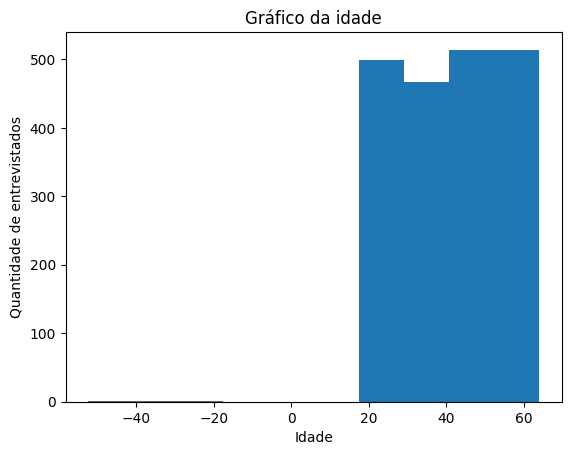

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1)
plt.hist(Base_Credit['income']);
plt.title('Gráfico da renda')
plt.ylabel('Quantidade de entrevistados')
plt.xlabel('Renda')

plt.figure(2)
plt.hist(Base_Credit['age']);
plt.title('Gráfico da idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de entrevistados')

plt.figure(3)